In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import pandas_profiling
#!pip
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
DF=pd.read_csv('Columbia_CLI.csv',index_col=0)
#Drop other columns that we don't need or that have too many null values
DF.drop(['member_id','CLI','sub_grade','emp_length','emp_title','pymnt_plan','desc','title','zip_code','addr_state','earliest_cr_line','mths_since_last_delinq','mths_since_last_record','initial_list_status','out_prncp','out_prncp_inv','total_pymnt','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','next_pymnt_d','application_type','policy_code','collections_12_mths_ex_med','last_credit_pull_d','acc_now_delinq'], axis=1, inplace=True)
half_count = len(DF) / 2
DF.dropna(thresh=half_count, axis=1, inplace=True)

In [ ]:
DF.shape

(999, 20)

In [ ]:
#DF.shape
#DF.columns
#DF.info()
#DF.describe()
DF.head(3)

,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int
id,,,,,,,,,,,,,,,,,,,,
1077501,36 months,10.65,162.87,B,RENT,24000.0,Verified,Fully Paid,credit_card,27.65,0,1,3,0,13648,83.7,9,5831.78,5000.00,861.07
1077430,60 months,15.27,59.83,C,RENT,30000.0,Source Verified,Charged Off,car,1.00,0,5,3,0,1687,9.4,4,1008.71,456.46,435.17
1077175,36 months,15.96,84.33,C,RENT,12252.0,Not Verified,Fully Paid,small_business,8.72,0,2,2,0,2956,98.5,10,3003.65,2400.00,603.65


In [ ]:
#We must drop the columns that have null values 
print(DF.isnull().max())

term                   False
int_rate               False
installment            False
grade                  False
home_ownership         False
annual_inc             False
verification_status    False
loan_status            False
purpose                False
dti                    False
delinq_2yrs            False
inq_last_6mths         False
open_acc               False
pub_rec                False
revol_bal              False
revol_util             False
total_acc              False
total_pymnt_inv        False
total_rec_prncp        False
total_rec_int          False
dtype: bool


In [ ]:
#Checking for outliers that could decrease the accuracy of our prediction model
#Aligning the grades in order
order = ['G', 'F', 'E', 'D', 'C', 'B', 'A']
DF['grade'] = pd.Categorical(DF['grade'], order)
DF.sort_values(by=['grade'], inplace = True)

x=DF['grade']
y=DF['CLI']
plt.scatter(x,y)

KeyError: ignored

In [ ]:
#Checking that our data is cleaned and ready to train
print('check the nan value in the DF data')
print(DF.isnull().sum())

check the nan value in the DF data
term                   0
int_rate               0
installment            0
grade                  0
home_ownership         0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
delinq_2yrs            0
inq_last_6mths         0
open_acc               0
pub_rec                0
revol_bal              0
revol_util             0
total_acc              0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
dtype: int64


In [ ]:
# Finding all the correlations and sorting them
correlation = DF.corr()['loan_status'].sort_values()

# Printing the correlations
print(correlation.head(15), '\n')

#I get a Key ERROR on loan_status, I think it's because the results are in str format

In [ ]:
DF = DF[DF['loan_status']!='Current']
DF = DF[DF['loan_status']!='Late (31-120 days)']
DF = DF[DF['loan_status']!='Default']

In [ ]:
#Turns loan_status column into 0's and 1's
# 1 = Fully Paid or Current, 0 = Charged Off/Defaulted
DF['loan_status'] = DF['loan_status'].replace('Charged Off', 0)
DF['loan_status'] = DF['loan_status'].replace('Fully Paid', 1)

In [ ]:
DF['loan_status'].unique()

array([1, 0])

In [ ]:
DF['loan_status']

id
1077501     Fully Paid
1077430    Charged Off
1077175     Fully Paid
1076863     Fully Paid
1075269     Fully Paid
              ...     
1057615     Fully Paid
1057818     Fully Paid
1057629     Fully Paid
1057621     Fully Paid
1057787     Fully Paid
Name: loan_status, Length: 905, dtype: object

In [ ]:
DF

,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,loan_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt_inv,total_rec_prncp,total_rec_int
id,,,,,,,,,,,,,,,,,,,,
1060753,60 months,23.91,715.75,G,RENT,60000.0,Verified,Fully Paid,credit_card,17.74,0,2,19,0,14265,98.9,26,37747.49,24925.00,12860.28
1061914,60 months,22.74,628.13,G,RENT,85000.0,Not Verified,Charged Off,credit_card,7.02,2,1,14,0,13773,58.7,16,26376.52,12893.89,13482.63
1060644,60 months,23.91,519.76,G,MORTGAGE,120000.0,Verified,Fully Paid,debt_consolidation,12.96,0,3,7,0,31992,99.0,20,22157.63,18100.00,4088.25
1058624,60 months,23.13,349.79,G,RENT,40000.0,Not Verified,Charged Off,other,20.88,0,0,27,0,13768,22.5,31,8530.26,2444.99,4602.60
1058484,36 months,20.89,270.86,F,MORTGAGE,88800.0,Verified,Charged Off,debt_consolidation,20.46,0,3,34,0,17998,57.5,61,6676.85,4068.87,2159.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1058552,36 months,7.90,469.36,A,RENT,43000.0,Source Verified,Fully Paid,debt_consolidation,19.40,0,0,9,0,12835,60.3,16,16891.50,15000.00,1896.24
1063892,36 months,6.62,552.67,A,MORTGAGE,78000.0,Not Verified,Fully Paid,debt_consolidation,6.35,0,0,8,0,16136,25.0,13,19892.95,18000.00,1892.95
1064061,36 months,6.03,219.14,A,MORTGAGE,60000.0,Not Verified,Fully Paid,other,2.54,0,0,6,0,3859,6.0,20,7854.56,7200.00,681.92


In [ ]:
def dummy_variables(DF, columns, prefixes):
    DF = DF.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(DF[column], prefix=prefix)
        DF = pd.concat([DF, dummies], axis=1)
        DF = DF.drop(column, axis=1) 
    return DF

In [ ]:
DF = dummy_variables(DF['term','grade','home_ownership','verification_status','purpose'],['tm','gr','ho','vs','ps'])

In [ ]:
from sklearn.model_selection import train_test_split
model_data = DF
all_features = model_data.drop("loan_status",axis=1)
Targeted_feature = model_data["loan_status"]

# total of 6891 records in dataset
# Divide the data set into two- 70% for train and 30% for test

#X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3)  
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)


In [ ]:
# Train the logistic regression model with training data

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = logreg.predict(X_test)

--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set: 0.99


Text(0.5, 1.05, 'Confusion_matrix')

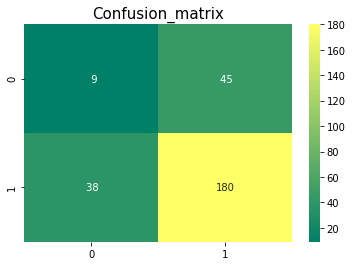

In [ ]:
from sklearn.metrics import confusion_matrix
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set: 0.99


Text(0.5, 1.05, 'Confusion_matrix')

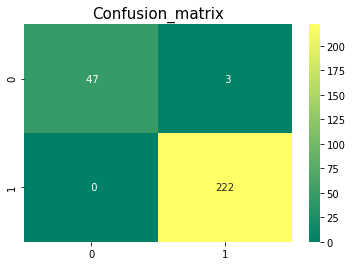

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=67)
# Train the logistic regression model with training data

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#Predict what it is going to be
y_pred = logreg.predict(X_test)

#Get the accuracy of the model
from sklearn.metrics import confusion_matrix
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
plt.title('Confusion_matrix', y=1.05, size=15)


In [ ]:
accuracy_sum = 0
for i in range(0, 1000):
  X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3)
  # Train the logistic regression model with training data

  from sklearn.linear_model import LogisticRegression

  logreg = LogisticRegression()
  logreg.fit(X_train, y_train)
  #Predict what it is going to be
  y_pred = logreg.predict(X_test)

  #Get the accuracy of the model
  from sklearn.metrics import confusion_matrix
  #print('--------------The Accuracy of the model----------------------------')
  #print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))
  accuracy_sum += logreg.score(X_test, y_test)
  #sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='3.0f',cmap="summer")
  #plt.title('Confusion_matrix', y=1.05, size=15)
print(accuracy_sum/1000)

0.9850477941176449


--------------The Accuracy of the model----------------------------
Accuracy of logistic regression classifier on test set: 0.89


Text(0.5, 1.05, 'Confusion_matrix')

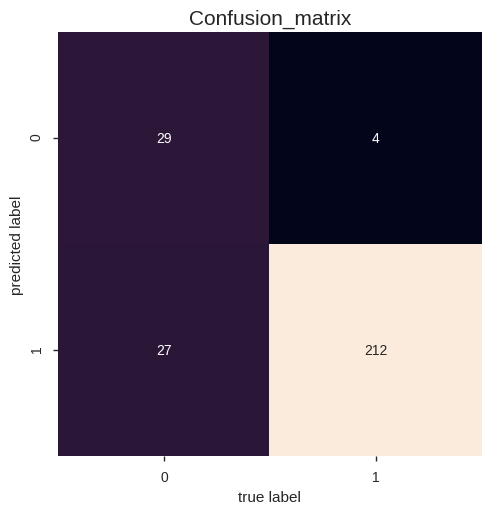

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=2,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
rf_model.fit(X_train,y_train)
y_pred_rm=rf_model.predict(X_test)
print('--------------The Accuracy of the model----------------------------')
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(rf_model.score(X_test, y_test)))

mat=confusion_matrix(y_test,y_pred_rm)
sns.heatmap(mat.T,square=True,annot=True,fmt='d',cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.title('Confusion_matrix', y=1.05, size=15)